# What comes to mind: extended experiments

## Description of experiments
This notebook consists of data from two experiments, which we call Stage 1 and Stage 2. 

Our experiment investigates what "comes to mind" when people think of examples from a category. We ask people to characterize these examples as better-than-average or worse-then-average. We then ask them whether they consider it more important to know information about better-than-average versus worse-than-average examples from each category. We hypothesize that what comes to mind spontaneously (i.e., better- or worse-than-average examples) will be predicted by what people consider it valuable to know about. In other words, we expect a positive correlation between how likely better-than-average items are to come to mind (vs. worse-than-average) and how much people consider it important to know about better-than-average items (vs. worse-than-average).

The experiment is composed of two main stages, and we use different participants for each of them. In Stage 1, we first ask participants to name the first example that comes to their mind on topic X, where X can be one of 11 domains:

1. Animals
2. Athletes
3. Cars
4. Diseases
5. Foods
6. Universities
7. Ways that weather can be
8. Government agencies
9. Insects
10. Bodily injuries
11. Terrorist organizations

For each of these domains, we then ask participants the following question: if they were to rank all the different kinds of examples in domain X, from the worst to the best, would they place the example they just provided: in the top half (with the better examples), or the bottom half (with the worse examples)?

In Stage 2, we ask a different set of participants one question for each of these 11 domains, which can be briefly summarized as: if you imagine all the different kinds of examples in domain X, do you think it's more important to know more about the examples that are better than average, or worse than average?

## Structure of the notebook
##### 1. Load both datasets
##### 2. Analyze data from Experiment 1 (Stage 1)
##### 3. Analyze data from Experiment 2 (Stage 2)
##### 4. Run a linear regression on combined experimental data
##### 5. Run a bootstrap analysis on combined experimental data

## 1. Load both datasets

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

df_exp1 = pd.read_csv('data/06_05_2024/exp1/exp1_anonymized.csv')
df_exp2 = pd.read_csv('data/06_05_2024/exp2/exp2_anonymized.csv')

#Filter for finished
df_exp1 = df_exp1[df_exp1["Finished"]==True]
df_exp2 = df_exp2[df_exp2["Finished"]==True]

print(len(df_exp1))
print(len(df_exp2))

200
200


In [55]:
#Filter for duration
#From preregistration: <70 sec for exp 1, <65 sec for exp2
df_exp1 = df_exp1[df_exp1["Duration"]>=70]
df_exp2 = df_exp2[df_exp2["Duration"]>=65]

print(len(df_exp1))
print(len(df_exp2))

200
199


## Analyze data from Experiment 1 (Stage 1)

In [56]:
# Calculate counts for each category in each question
columns = ["Q21", "Q22", "Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q291", "Q292"]

results = {}
for column in columns:
    results[column] = df_exp1[column].value_counts()

# Print counts
for question, counts in results.items():
    print(f"Counts for {question}:")
    print(counts)
    print()

Counts for Q21:
Q21
In the top half, with the better ones      188
In the bottom half, with the worse ones     12
Name: count, dtype: int64

Counts for Q22:
Q22
In the top half, with the better ones      188
In the bottom half, with the worse ones     12
Name: count, dtype: int64

Counts for Q23:
Q23
In the top half, with the better ones      170
In the bottom half, with the worse ones     30
Name: count, dtype: int64

Counts for Q24:
Q24
In the bottom half, with the worse ones    161
In the top half, with the better ones       39
Name: count, dtype: int64

Counts for Q25:
Q25
In the top half, with the better ones      184
In the bottom half, with the worse ones     16
Name: count, dtype: int64

Counts for Q26:
Q26
In the top half, with the better ones      178
In the bottom half, with the worse ones     22
Name: count, dtype: int64

Counts for Q27:
Q27
In the top half, with the better ones      131
In the bottom half, with the worse ones     69
Name: count, dtype: int64

Counts for Q2

In [57]:
questions = list(results.keys())
bottom_counts = [results[q]["In the bottom half, with the worse ones"] for q in questions]
top_counts = [results[q]["In the top half, with the better ones"] for q in questions]

# Normalize the counts to get proportions
total_counts = [bottom + top for bottom, top in zip(bottom_counts, top_counts)]

bottom_props_g1 = [bottom / total for bottom, total in zip(bottom_counts, total_counts)]
top_props_g1 = [top / total for top, total in zip(top_counts, total_counts)]

# Mapping the question codes to more descriptive labels
question_labels = {
    'Q21': 'Animals',
    'Q22': 'Athletes',
    'Q23': 'Cars',
    'Q24': 'Diseases',
    'Q25': 'Foods',
    'Q26': 'Universities',
    'Q27': 'Weather Types',
    'Q28': 'Gov Agencies',
    'Q29': 'Insects',
    'Q291': 'Bodily Injuries',
    'Q292': 'Terrorist Orgs'
}

labels = [question_labels[q] for q in questions]

/var/folders/kq/690dvspn7dv8y9zql829_bhr0000gn/T/ipykernel_27488/1991653868.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(reversed(ax.legend().legendHandles), ['Better than avg.\n(Top half)', 'Worse than avg.\n(Bottom Half)'], loc='upper left', bbox_to_anchor=(1.01, 1))


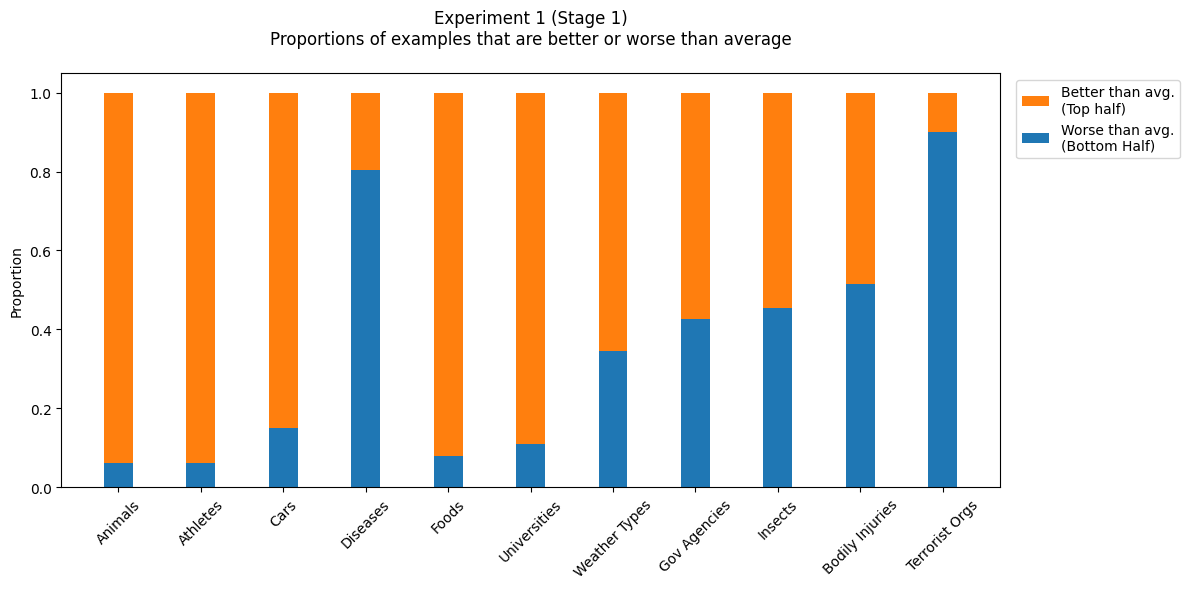

In [60]:
bar_width = 0.35

# Moving the legend outside of the plot area to avoid covering the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bar_bottom = ax.bar(labels, bottom_props_g1, bar_width, label='Bottom Half')
bar_top = ax.bar(labels, top_props_g1, bar_width, bottom=bottom_props_g1, label='Top Half')

# Manually adjusting the order of legend entries and moving it outside the plot
ax.legend(reversed(ax.legend().legendHandles), ['Better than avg.\n(Top half)', 'Worse than avg.\n(Bottom Half)'], loc='upper left', bbox_to_anchor=(1.01, 1))

ax.set_ylabel('Proportion')
ax.set_title('Experiment 1 (Stage 1)\nProportions of examples that are better or worse than average\n')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)

plt.tight_layout()

# Save the figure
plt.savefig('exp1_1.png', dpi=300, bbox_inches='tight')  # Saves the figure as a PNG file with high resolution

plt.tight_layout()
plt.show()


## 3. Analyze data from Experiment 2 (Stage 2)

In [61]:
# Calculate counts for each category in each question
columns = ["Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q191", "Q192"]

results = {}
for column in columns:
    results[column] = df_exp2[column].value_counts()

# Print counts
for question, counts in results.items():
    print(f"Counts for {question}:")
    print(counts)
    print()

Counts for Q11:
Q11
The ones in the top half – the better ones      158
The ones in the bottom half – the worse ones     41
Name: count, dtype: int64

Counts for Q12:
Q12
The ones in the top half – the better ones      184
The ones in the bottom half – the worse ones     15
Name: count, dtype: int64

Counts for Q13:
Q13
The ones in the top half – the better ones      176
The ones in the bottom half – the worse ones     23
Name: count, dtype: int64

Counts for Q14:
Q14
The ones in the bottom half – the worse ones    152
The ones in the top half – the better ones       47
Name: count, dtype: int64

Counts for Q15:
Q15
The ones in the top half – the better ones      181
The ones in the bottom half – the worse ones     18
Name: count, dtype: int64

Counts for Q16:
Q16
The ones in the top half – the better ones      175
The ones in the bottom half – the worse ones     24
Name: count, dtype: int64

Counts for Q17:
Q17
The ones in the bottom half – the worse ones    138
The ones in the top ha

In [62]:
#find proportions
questions = list(results.keys())
bottom_counts = [results[q]["The ones in the bottom half – the worse ones"] for q in questions]
top_counts = [results[q]["The ones in the top half – the better ones"] for q in questions]

# Normalize the counts to get proportions
total_counts = [bottom + top for bottom, top in zip(bottom_counts, top_counts)]
bottom_props_g2 = [bottom / total for bottom, total in zip(bottom_counts, total_counts)]
top_props_g2 = [top / total for top, total in zip(top_counts, total_counts)]

bottom_props_g2 = [bottom / total for bottom, total in zip(bottom_counts, total_counts)]
top_props_g2 = [top / total for top, total in zip(top_counts, total_counts)]

In [63]:
# Mapping the question codes to more descriptive labels
question_labels = {
    'Q11': 'Animals',
    'Q12': 'Athletes',
    'Q13': 'Cars',
    'Q14': 'Diseases',
    'Q15': 'Foods',
    'Q16': 'Universities',
    'Q17': 'Weather Types',
    'Q18': 'Gov Agencies',
    'Q19': 'Insects',
    'Q191': 'Bodily Injuries',
    'Q192': 'Terrorist Orgs'
}

labels = [question_labels[q] for q in questions]

/var/folders/kq/690dvspn7dv8y9zql829_bhr0000gn/T/ipykernel_27488/51021576.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.legend(reversed(ax.legend().legendHandles), ['Better than avg.\n(Top half)', 'Worse than avg.\n(Bottom Half)'], loc='upper left', bbox_to_anchor=(1.01, 1))


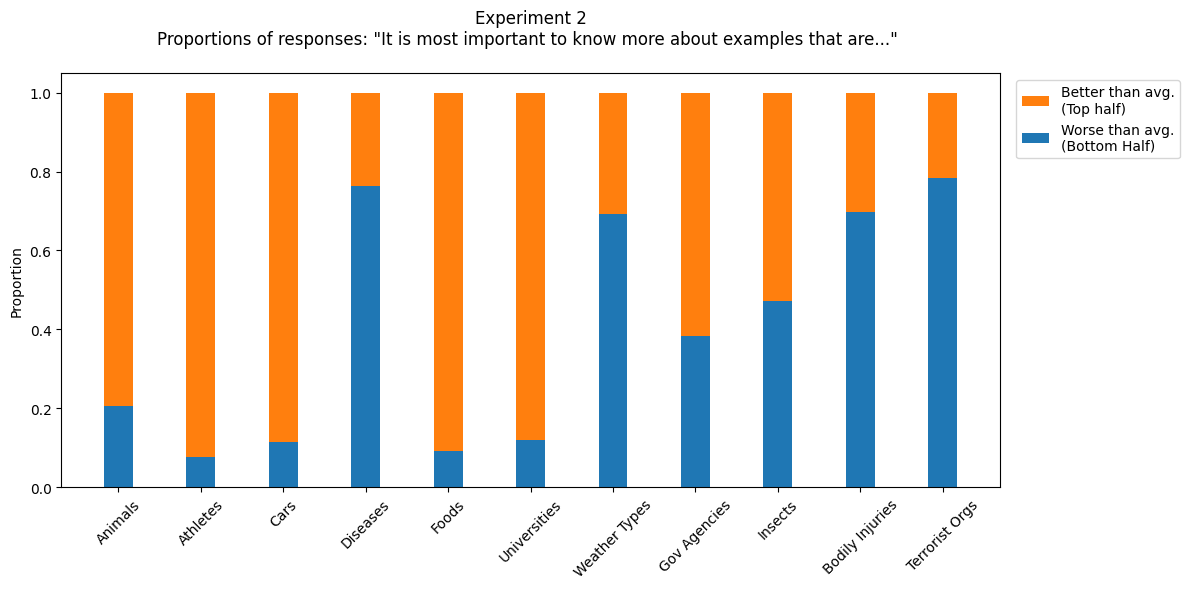

In [65]:
# Moving the legend outside of the plot area to avoid covering the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bar_bottom = ax.bar(labels, bottom_props_g2, bar_width, label='Bottom Half')
bar_top = ax.bar(labels, top_props_g2, bar_width, bottom=bottom_props_g2, label='Top Half')

# Manually adjusting the order of legend entries and moving it outside the plot
ax.legend(reversed(ax.legend().legendHandles), ['Better than avg.\n(Top half)', 'Worse than avg.\n(Bottom Half)'], loc='upper left', bbox_to_anchor=(1.01, 1))

ax.set_ylabel('Proportion')
ax.set_title('Experiment 2\nProportions of responses: "It is most important to know more about examples that are..." \n')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45)

plt.tight_layout()

plt.savefig('exp2_1.png', dpi=300, bbox_inches='tight')  # Saves the figure as a PNG file with high resolution

plt.tight_layout()
plt.show()


## 4. Run a linear regression on combined experimental data
### 4.1 standardize data

In [67]:
#non standardized data
print(top_props_g1)
print("")
print(top_props_g2)

[0.94, 0.94, 0.85, 0.195, 0.92, 0.89, 0.655, 0.575, 0.545, 0.485, 0.1]

[0.7939698492462312, 0.9246231155778895, 0.8844221105527639, 0.23618090452261306, 0.9095477386934674, 0.8793969849246231, 0.3065326633165829, 0.6180904522613065, 0.5276381909547738, 0.3015075376884422, 0.21608040201005024]


In [68]:
#standardize
top_props_g1 = (top_props_g1 - np.mean(top_props_g1)) / np.std(top_props_g1)
top_props_g2 = (top_props_g2 - np.mean(top_props_g2)) / np.std(top_props_g2)

print(top_props_g1)
print("")
print(top_props_g2)

[ 1.03603028  1.03603028  0.71995325 -1.58038518  0.96579094  0.86043193
  0.03511967 -0.24583769 -0.35119671 -0.56191473 -1.91402205]

[ 0.69504596  1.162771    1.0188556  -1.30178019  1.10880272  1.00086618
 -1.04992824  0.06541609 -0.25839356 -1.06791767 -1.37373789]


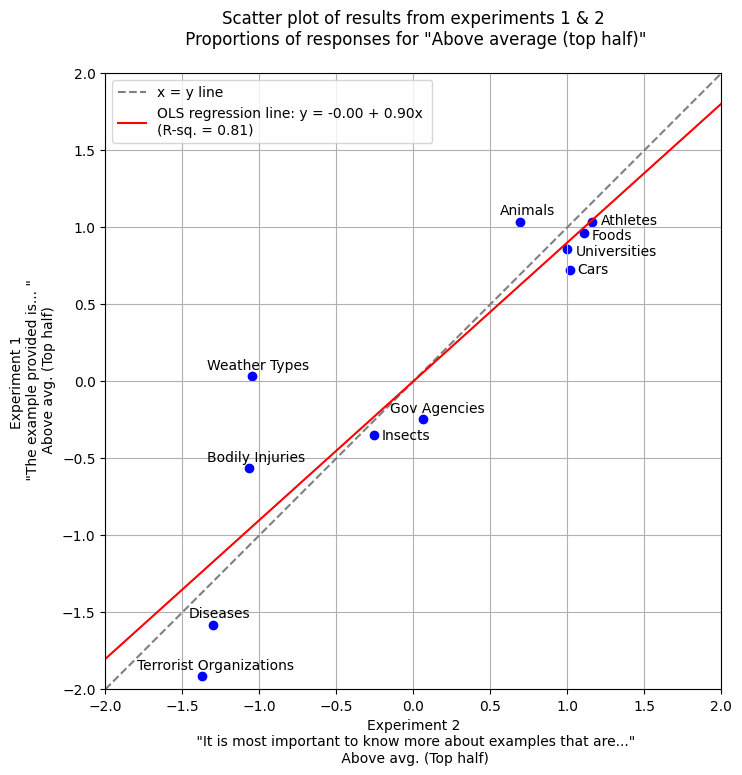

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Define the vectors
#top_props_g2 = [0.82, 0.9, 0.81, 0.19, 0.86, 0.88, 0.35, 0.61, 0.54]
#top_props_g1 = [0.95, 0.96, 0.89, 0.14, 0.95, 0.86, 0.58, 0.49, 0.57]

# Define the labels
question_labels = [
    'Animals',
    'Athletes',
    'Cars',
    'Diseases',
    'Foods',
    'Universities',
    'Weather Types',
    'Gov Agencies',
    'Insects',
    'Bodily Injuries',
    'Terrorist Organizations',
]

# Perform linear regression using statsmodels
X = sm.add_constant(top_props_g2)  # Adds a constant term to the predictor
model = sm.OLS(top_props_g1, X).fit()
predictions = model.predict(X)

# Extract the regression parameters
slope = model.params[1]
intercept = model.params[0]
r_squared = model.rsquared

# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(top_props_g2, top_props_g1, color='blue')

# Annotate each point with the corresponding label
for i, label in enumerate(question_labels):
    if label == 'Foods':
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(20, -5), ha='center')

    elif label == "Gov Agencies":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(10, 5), ha='center')

    elif label == "Insects":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(23, -3), ha='center')

    
    elif label == "Athletes":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(27, -2), ha='center')

    elif label == "Universities":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(35, -5), ha='center')

    elif label == "Cars":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(16, -2), ha='center')

    elif label == "Terrorist Organizations":
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(10, 5), ha='center')

    else:
        plt.annotate(label, (top_props_g2[i], top_props_g1[i]), textcoords="offset points", xytext=(5, 5), ha='center')



# Add x = y line
plt.plot([-2, 2], [-2, 2], color='gray', linestyle='--', label='x = y line')

# Add regression line (trend line)
x_vals = np.array([-2, 2])
plt.plot(x_vals, slope * x_vals + intercept, color='red', label=f'OLS regression line: y = {intercept:.2f} + {slope:.2f}x \n(R-sq. = {r_squared:.2f})')

plt.xlabel('Experiment 2\n "It is most important to know more about examples that are..."\n Above avg. (Top half)')
plt.ylabel('Experiment 1\n "The example provided is... "\n Above avg. (Top half)')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Add legend
plt.legend()
plt.title('Scatter plot of results from experiments 1 & 2\n Proportions of responses for "Above average (top half)"\n')

# Save the figure with higher resolution
plt.savefig('exp1_2_scatter_plot_with_reg.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

### 4.3 Print model summary

In [70]:
# Print regression summary
print(f"Regression Equation: y = {intercept:.2f} + {slope:.2f}x")
print(f"R-squared: {r_squared:.2f}")
print(model.summary())

Regression Equation: y = -0.00 + 0.90x
R-squared: 0.81
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     38.98
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           0.000151
Time:                        17:40:13   Log-Likelihood:                -6.4033
No. Observations:                  11   AIC:                             16.81
Df Residuals:                       9   BIC:                             17.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/Users/linasnasvytis/Desktop/Harvard/Fiery/VAEs/venvs/general/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 4.4 Find full p value of the slope

In [47]:
# Extract the full p-value for x1
p_value_x1 = model.pvalues[1]

# Print the full p-value for x1
print(f"Full p-value for x1: {p_value_x1}")

Full p-value for x1: 0.0001507635653105606


## 5. Run a bootstrap analysis on combined data from both experiments

Empirical Slope: 0.9013528504107801
Proportion of bootstrapped slopes >= empirical slope: 0.0004


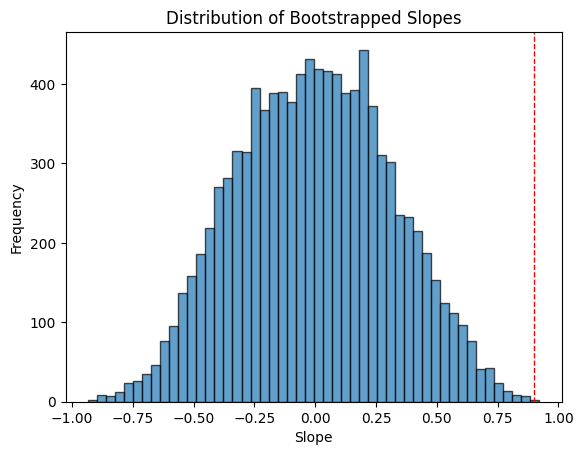

In [111]:
# Bootstrapping analysis
# Sampling with replacement
n_iterations = 10000
n_size = len(top_props_g1)
slopes = []

for i in range(n_iterations):
    # Resample with replacement
    #generate indices
    indices_1 = np.random.choice(range(n_size), n_size, replace=True)
    indices_2 = np.random.choice(range(n_size), n_size, replace=True)
    
    resample_g1 = [top_props_g1[j] for j in indices_1]
    resample_g2 = [top_props_g2[j] for j in indices_2]

    #standardize
    resample_g1 = (resample_g1 - np.mean(resample_g1)) / np.std(resample_g1)
    resample_g2 = (resample_g2 - np.mean(resample_g2)) / np.std(resample_g2)
    
    # Fit the model on resampled data
    X_resample = sm.add_constant(resample_g2)
    model_resample = sm.OLS(resample_g1, X_resample).fit()
    
    # Store the slope
    slopes.append(model_resample.params[1])
    
# Calculate the empirical slope
empirical_slope = model.params[1]

# Calculate the proportion of slopes with absolute value greater than or equal to empirical slope
proportion = np.sum(np.abs(slopes) >= np.abs(empirical_slope)) / n_iterations
#proportion = np.sum(np.array(slopes) >= empirical_slope) / n_iterations

print(f"Empirical Slope: {empirical_slope}")
print(f"Proportion of bootstrapped slopes >= empirical slope: {proportion}")

# Plotting the distribution of bootstrapped slopes
plt.hist(slopes, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(empirical_slope, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of Bootstrapped Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()
